# Part 1

In [24]:
#  Imports

import csv
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# Grab data from current directory

raw_data = list()
with open('diabetes.csv') as file:
    reader = csv.reader(file)
    
    for row in reader:
        if len(row) > 0:
            try:
                raw_data.append(np.array(row, dtype='f'))
            except:
                print(row)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [26]:
#  Split data into train and test datasets

## TODO: Randomly choose 540 points for training data rather than first 540

X_train = np.array(raw_data[:540])
Y_train = X_train[:,-1]
X_train = X_train[:, :-1]


X_test = np.array(raw_data[540:])
Y_test = X_test[:,-1]
X_test = X_test[:, :-1]


In [27]:
X_test.shape

(228, 8)

In [28]:
#  Split train data set into positive and negatie cases

X_train_1 = list()
X_train_0 = list()
for i, row in enumerate(X_train):
    if Y_train[i] == 1:
        X_train_1.append(row)
    else:
        X_train_0.append(row)
        
X_train_1 = np.array(X_train_1, dtype='f')
X_train_0 = np.array(X_train_0, dtype='f')

print(X_train_1.shape, X_train_0.shape)

(190, 8) (350, 8)


In [29]:
#  Find means and std of each column

columnMeans_0 = list()
columnMeans_1 = list()
columnSTD_0 = list()
columnSTD_1 = list()
for i in range(8):
    columnMeans_0.append(np.mean(X_train_0[:,i]))
    columnMeans_1.append(np.mean(X_train_1[:,i]))
    columnSTD_0.append(np.std(X_train_0[:,i]))
    columnSTD_1.append(np.std(X_train_1[:,i]))

In [30]:
# Print means and stds of each feature for positive and negative cases

print(columnMeans_0)
print(columnMeans_1)
print(columnSTD_0)
print(columnSTD_1)

[3.26, 109.777145, 67.90857, 19.53143, 67.69143, 29.939716, 0.44142282, 31.385714]
[4.8210526, 139.6421, 69.68421, 21.847368, 100.82632, 35.26, 0.5659263, 36.33684]
[2.974818, 27.318577, 17.87505, 14.816126, 102.21673, 7.986814, 0.30297697, 11.95168]
[3.7556386, 32.482357, 22.422388, 17.17841, 138.13402, 7.358288, 0.38852227, 10.630256]


In [31]:
def normpdf(x, mu, sigma):
    coeff = 1/(sigma*np.sqrt(2*np.pi))
    num = -1*np.power((x-mu),2)
    denom = (2*sigma*sigma)
    return coeff * np.exp(num/denom)

In [32]:
# Part C - Part 1
# Record p(Xj | w0) and p(Xj | w1) into vals_0 and vals_1 respectively
# We simply record the full array here, leaving it expanded to the features

vals_1 = list()
vals_0 = list()

for row in range(len(X_test)):
    for feature in range(len(X_test[row])):
        new_val = []
        new_val.append(normpdf(X_test[row][feature], columnMeans_1[feature], columnSTD_1[feature]))
        vals_1.append(new_val)
        
    for feature in range(len(X_test[row])):
        new_val = []
        new_val.append(normpdf(X_test[row][feature], columnMeans_0[feature], columnSTD_0[feature]))
        vals_0.append(new_val)
        
vals_1 = np.array(vals_1, dtype='f')
vals_0 = np.array(vals_0, dtype='f')

In [33]:
# Part C - Part 2
# Multiply the 8 values of each row together

for i, row in enumerate(vals_1):
    vals_1[i] = np.prod(row)
    
for i, row in enumerate(vals_0):
    vals_0[i] = np.prod(row)

In [34]:
# Rest of Part C

posterior_1 = 0.35 * vals_1
posterior_0 = 0.65 * vals_0

correct = 0
for i in range(len(Y_test)):
    positive_case = posterior_1[i] > posterior_0[i]
    if positive_case == Y_test[i]: correct += 1

print("Correctly classified: " + str(correct/len(Y_test)) + "%")

Correctly classified: 0.6491228070175439%


# Part 2


### Source: https://www.machinelearningplus.com/statistics/mahalanobis-distance/

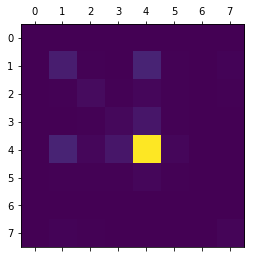

In [35]:
# Create covariance and inverse covariance matrix - plot using matplotlib import

cov = np.cov(X_train.T)
plt.matshow(cov)
plt.show()
inv_cov = np.linalg.inv(cov)

In [52]:
# Means and std for class 0 and 1
mean_0 = np.array(columnMeans_0)
mean_1 = np.array(columnMeans_1)

print(mean_0)
print(mean_1)

[  3.26       109.777145    67.90857     19.53143     67.69143
  29.939716     0.44142282  31.385714  ]
[  4.8210526 139.6421     69.68421    21.847368  100.82632    35.26
   0.5659263  36.33684  ]


In [49]:
data = np.array(X_test)

# Find M distance for negative cases
step1 = np.dot((data - mean_0), inv_cov)
step2 = np.dot(step1, (data-mean_0).T)
d_0 = step2.diagonal()


# Find M distance for positive cases
step1 = np.dot((data - mean_1), inv_cov)
step2 = np.dot(step1, (data-mean_1).T)
d_1 = step2.diagonal()


In [50]:
dprime_0 = d_0 - np.log(0.65)
dprime_1 = d_1 - np.log(0.35)

In [51]:
correct = 0
for i in range(len(Y_test)):
    positive_case = dprime_1[i] < dprime_0[i]
    if positive_case == Y_test[i]:
        correct += 1
print("Correctly classified: " + str(correct/len(Y_test)) + "%")

Correctly classified: 0.7982456140350878%


## Comparison Between Classifiers

You do this i dont wanna :^(